# Generators in Python

In [ ]:
# Generators in Python enable efficient, lazy iteration over large or infinite data sets by yielding items one at a time without storing the entire sequence in memory. They improve performance, reduce memory usage, and simplify code when dealing with streams, pipelines, or computations that produce values on demand. A generator function returns a generator object.
def gen_func(n):
    for i in range(n):
        yield i

gen_obj = gen_func(5)
next(gen_obj),next(gen_obj),next(gen_obj) # next(gen_obj) will call the gen_func which will return the next value generted by the yield

(0, 1, 2)

In [ ]:
# We can also print the values using:
for k in gen_obj:
    print(k) # Return ONLY the remaining values..not the whole list again. Keep in mind.

3
4


# Caching in python

### **Reasons to use `lru_cache`:**

1. **Avoids redundant computation**

   ```python
   @lru_cache
   def square(n): return n * n
   square(4)  # Computed once, reused later
   ```

2. **Minimal code to enable caching**

   ```python
   @lru_cache
   def compute(): pass  # Just add the decorator
   ```

3. **Ideal for pure functions**

   ```python
   @lru_cache
   def add(a, b): return a + b  # Same input always gives same output
   ```

4. **Great for recursion**

   ```python
   @lru_cache
   def fib(n): return n if n < 2 else fib(n-1) + fib(n-2)
   # Speeds up recursive Fibonacci
   ```

5. **Built-in size limit avoids memory bloat**

   ```python
   @lru_cache(maxsize=100)  # Keeps only 100 recent calls
   def heavy_task(x): pass
   ```

---

### **Reasons not to use `lru_cache`:**

1. **Fails with non-deterministic functions** (meaning if the function will run for a very large number of values, in that case we should fix the max-size appropriately)

   ```python
   @lru_cache
   def random_val(): return random.random()  # Returns stale result
   ```

2. **Memory grows with unique arguments**

   ```python
   @lru_cache
   def echo(x): return x
   for i in range(1_000_000): echo(i)  # Large memory footprint
   ```

3. **May not be thread-safe** (prior to Python 3.9)
   Use with caution in multi-threaded environments.

4. **Only works with hashable arguments**

   ```python
   @lru_cache
   def bad_func(x): return x
   bad_func([1, 2])  # TypeError: unhashable type: 'list'
   ```

5. **Stale data if external state changes**

   ```python
   @lru_cache
   def get_user(id): return db.fetch(id)
   # Will not reflect database updates until cache is cleared
   ```


In [ ]:
from functools import lru_cache
import time

@lru_cache
def fib(n): return n if n<2 else fib(n-1)+fib(n-2)

start = time.time()
for i in range(1,40):
    _ = fib(i)
end = time.time()
print(f"It took {end-start} seconds") # 78.82 without caching; 0.0 seconds with caching!!

It took 0.0 seconds


# AsyncIO in Python

In [9]:
import asyncio
import time

async def fun1():
    print("started fun1")
    await asyncio.sleep(2)
    print("Ended fun1")

async def fun2():
    print("started fun2")
    await asyncio.sleep(4)
    print("Ended fun2")

async def main():
    await asyncio.gather(fun1(), fun2())  # Wrap gather in a coroutine

# asyncio.run(main())  # Pass the coroutine to asyncio.run()
"""
The error occurs because asyncio.run() cannot be called when there is already a running event loop. This is common in environments like Jupyter Notebooks, which often have an active event loop running in the background.
"""
""

''

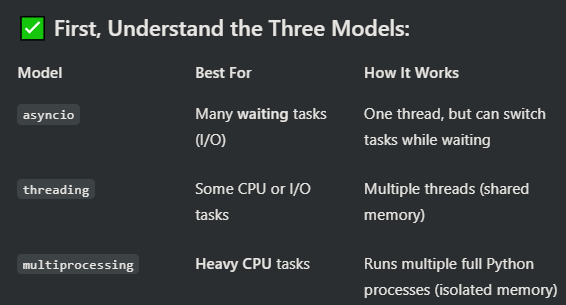
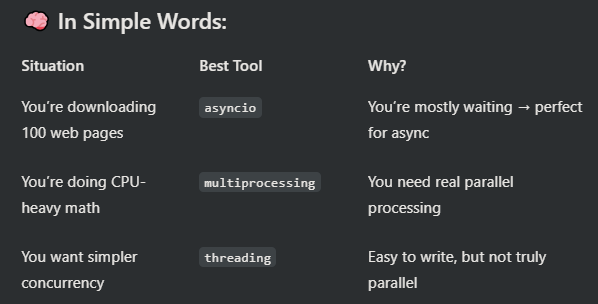
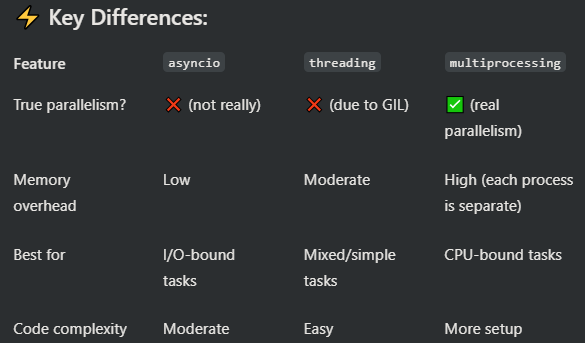

# Multithreading in Python

In [ ]:
import threading
import time

def f1(n):
    print("Starting f1")
    time.sleep(n)
    print("End of f1")

def f2(n):
    print("Starting f2")
    time.sleep(n)
    print("End of f2")

t1 = threading.Thread(target = f1, args=[4])
t2 = threading.Thread(target=f2, args=[2])
t1.start()
t2.start()
print("Everything finished")

Starting f1
Starting f2
Everything finished


End of f2
End of f1


In [17]:
def f1(n):
    print("Starting f1")
    time.sleep(n)
    print("End of f1")

def f2(n):
    print("Starting f2")
    time.sleep(n)
    print("End of f2")

t1 = threading.Thread(target = f1, args=[4])
t2 = threading.Thread(target=f2, args=[2])
t1.start()
t2.start()

t1.join()
t2.join()
print("Everything finished")

Starting f1
Starting f2
End of f2
End of f1
Everything finished
